### Importation des bibliothèques et chargement des données

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt # visualizations


    
financials = pd.read_csv(r'C:\Users\HP\Downloads\Financials.csv')

financials.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


Data cleaning

In [ ]:
### Nettoyage des noms de colonnes
print('Before changes: ')
print(financials.columns)

financials.columns = financials.columns.str.strip()

print('After changes: ')
print(financials.columns)

Before changes: 
Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')
After changes: 
Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')


In [4]:
# -- replace middle whitespace in column names with underscore

print('Before changes: ')
print(financials.columns)

financials = financials.rename(columns=lambda x: x.replace(' ','_'))

print('After changes: ')
print(financials.columns)

Before changes: 
Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')
After changes: 
Index(['Segment', 'Country', 'Product', 'Discount_Band', 'Units_Sold',
       'Manufacturing_Price', 'Sale_Price', 'Gross_Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month_Number', 'Month_Name',
       'Year'],
      dtype='object')


In [5]:
# Get rid of parentheses, '$', commas, dashes, and spaces in numerical columns
def convert_negatives(val):
    if isinstance(val, str):
        if val.startswith('(') and val.endswith(')'):
            return -float(val[1:-1].replace(',',''))
        else:
            return float(val)
    else:
        return val

columns_to_clean = ['Units_Sold', 'Manufacturing_Price','Sale_Price',
                    'Gross_Sales','Discounts','Sales','COGS','Profit']
for col in columns_to_clean:
    if financials[col].dtype == 'object':
        financials[col] = financials[col].str.replace('$','').str.replace('-','').str.replace(',','').str.strip()
        financials[col] = financials[col].replace('', np.nan).apply(convert_negatives).astype(float)

financials['Product'] = financials['Product'].str.replace(' ','')

In [6]:
financials['Date'] = financials['Date'].str.replace('/', '')
print(financials.head())

      Segment  Country    Product Discount_Band  Units_Sold  \
0  Government   Canada  Carretera         None       1618.5   
1  Government  Germany  Carretera         None       1321.0   
2   Midmarket   France  Carretera         None       2178.0   
3   Midmarket  Germany  Carretera         None        888.0   
4   Midmarket   Mexico  Carretera         None       2470.0   

   Manufacturing_Price  Sale_Price  Gross_Sales  Discounts    Sales     COGS  \
0                  3.0        20.0      32370.0        NaN  32370.0  16185.0   
1                  3.0        20.0      26420.0        NaN  26420.0  13210.0   
2                  3.0        15.0      32670.0        NaN  32670.0  21780.0   
3                  3.0        15.0      13320.0        NaN  13320.0   8880.0   
4                  3.0        15.0      37050.0        NaN  37050.0  24700.0   

    Profit      Date  Month_Number Month_Name  Year  
0  16185.0  01012014             1   January   2014  
1  13210.0  01012014            

In [62]:
### Encodage des colonnes catégoriques
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['Segment', 'Country', 'Product', 'Discount_Band', 'Month_Name']

# Apply LabelEncoder to each column
label_encoder = LabelEncoder()
for col in categorical_columns:
    financials[col] = label_encoder.fit_transform(financials[col])
print(financials.head())

   Segment  Country  Product  Discount_Band  Units_Sold  Manufacturing_Price  \
0        2        0        1              3    0.012365            -0.861342   
1        2        2        1              3   -0.331463            -0.861342   
2        3        1        1              3    0.658993            -0.861342   
3        3        2        1              3   -0.831892            -0.861342   
4        3        3        1              3    0.996464            -0.861342   

   Sale_Price    Profit       Date  Month_Number  Month_Name     Year  Day  
0   -0.720150  0.011736 2014-01-01     -2.044501           4  0.57735  0.0  
1   -0.720150 -0.139250 2014-01-01     -2.044501           4  0.57735  0.0  
2   -0.756733 -0.256994 2014-06-01     -0.562978           6  0.57735  0.0  
3   -0.756733 -0.584342 2014-06-01     -0.562978           6  0.57735  0.0  
4   -0.756733 -0.182896 2014-06-01     -0.562978           6  0.57735  0.0  


### Gestion des valeurs manquantes

In [8]:
missing_values = financials.isna().sum()
total_values = len(financials['Discounts'])
print(f"Total values in the column: {total_values}")
print(missing_values)

Total values in the column: 700
Segment                 0
Country                 0
Product                 0
Discount_Band           0
Units_Sold              0
Manufacturing_Price     0
Sale_Price              0
Gross_Sales             0
Discounts              53
Sales                   0
COGS                    0
Profit                  5
Date                    0
Month_Number            0
Month_Name              0
Year                    0
dtype: int64


In [9]:
financials['Discounts'] = financials['Discounts'].fillna(financials['Discounts'].mean())
financials['Profit'] = financials['Profit'].fillna(financials['Profit'].mean())
financials['Date'] = pd.to_datetime(financials['Date'], format='%d%m%Y')

# Extract year, month, and day as separate features
financials['Year'] = financials['Date'].dt.year
financials['Month'] = financials['Date'].dt.month
financials['Day'] = financials['Date'].dt.day

print(financials[['Year', 'Month', 'Day']].head())
print(financials.head())

   Year  Month  Day
0  2014      1    1
1  2014      1    1
2  2014      6    1
3  2014      6    1
4  2014      6    1
   Segment  Country  Product  Discount_Band  Units_Sold  Manufacturing_Price  \
0        2        0        1              3      1618.5                  3.0   
1        2        2        1              3      1321.0                  3.0   
2        3        1        1              3      2178.0                  3.0   
3        3        2        1              3       888.0                  3.0   
4        3        3        1              3      2470.0                  3.0   

   Sale_Price  Gross_Sales     Discounts    Sales     COGS   Profit  \
0        20.0      32370.0  14227.586198  32370.0  16185.0  16185.0   
1        20.0      26420.0  14227.586198  26420.0  13210.0  13210.0   
2        15.0      32670.0  14227.586198  32670.0  21780.0  10890.0   
3        15.0      13320.0  14227.586198  13320.0   8880.0   4440.0   
4        15.0      37050.0  14227.586198  37

### Standardisation des colonnes numériques


In [10]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
numerical_columns = ['Units_Sold', 'Manufacturing_Price', 'Sale_Price', 
                     'Gross_Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
financials[numerical_columns] = scaler.fit_transform(financials[numerical_columns])

print(financials.head())

   Segment  Country  Product  Discount_Band  Units_Sold  Manufacturing_Price  \
0        2        0        1              3    0.011774            -0.861342   
1        2        2        1              3   -0.331439            -0.861342   
2        3        1        1              3    0.657246            -0.861342   
3        3        2        1              3   -0.830973            -0.861342   
4        3        3        1              3    0.994114            -0.861342   

   Sale_Price  Gross_Sales     Discounts     Sales      COGS    Profit  \
0   -0.720150    -0.591897  8.035917e-17 -0.580152 -0.634647 -0.190307   
1   -0.720150    -0.615314  8.035917e-17 -0.605304 -0.649251 -0.260010   
2   -0.756733    -0.590716  8.035917e-17 -0.578884 -0.607183 -0.314367   
3   -0.756733    -0.666873  8.035917e-17 -0.660682 -0.670505 -0.465488   
4   -0.756733    -0.573477  8.035917e-17 -0.560368 -0.592850 -0.280159   

        Date  Month_Number  Month_Name  Year  Month  Day  
0 2014-01-01   

### Visualisation des boîtes à moustaches

<Axes: >

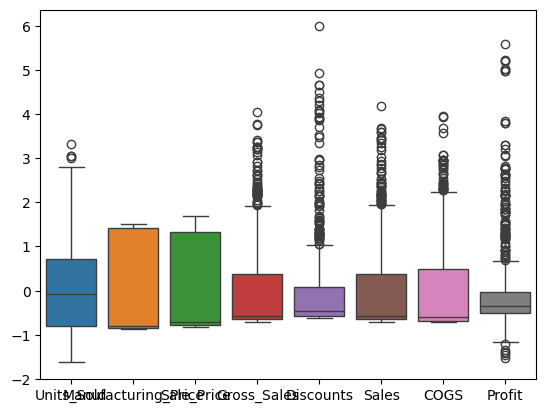

In [11]:
import seaborn as sns
sns.boxplot(data=financials[numerical_columns])

### Gestion des valeurs aberrantes

In [12]:
# Define a function to cap outliers
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply to numerical columns
numerical_columns = ['Units_Sold', 'Manufacturing_Price', 'Sale_Price', 
                     'Gross_Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

for col in numerical_columns:
    cap_outliers_iqr(financials, col)

print(financials.head())

   Segment  Country  Product  Discount_Band  Units_Sold  Manufacturing_Price  \
0        2        0        1              3    0.011774            -0.861342   
1        2        2        1              3   -0.331439            -0.861342   
2        3        1        1              3    0.657246            -0.861342   
3        3        2        1              3   -0.830973            -0.861342   
4        3        3        1              3    0.994114            -0.861342   

   Sale_Price  Gross_Sales     Discounts     Sales      COGS    Profit  \
0   -0.720150    -0.591897  8.035917e-17 -0.580152 -0.634647 -0.190307   
1   -0.720150    -0.615314  8.035917e-17 -0.605304 -0.649251 -0.260010   
2   -0.756733    -0.590716  8.035917e-17 -0.578884 -0.607183 -0.314367   
3   -0.756733    -0.666873  8.035917e-17 -0.660682 -0.670505 -0.465488   
4   -0.756733    -0.573477  8.035917e-17 -0.560368 -0.592850 -0.280159   

        Date  Month_Number  Month_Name  Year  Month  Day  
0 2014-01-01   

<Axes: >

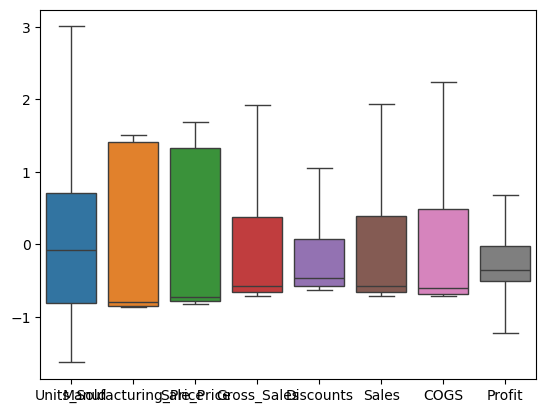

In [13]:
import seaborn as sns
sns.boxplot(data=financials[numerical_columns])

### Analyse de corrélation


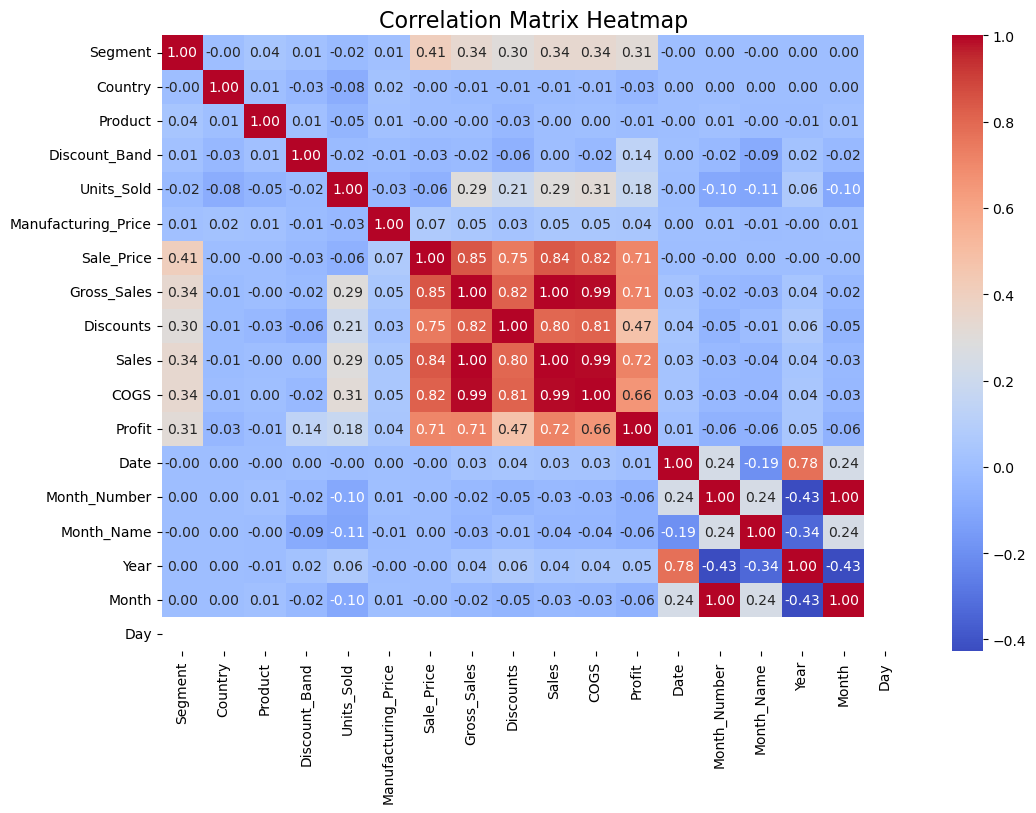

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = financials.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add a title
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

In [15]:
# Calculate the correlation matrix
correlation_matrix = financials.corr()

# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
high_correlation = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

# Drop highly correlated features
financials = financials.drop(columns=high_correlation)

print(f"Removed columns: {high_correlation}")
print(financials.head())

Removed columns: ['Gross_Sales', 'Discounts', 'Sales', 'COGS', 'Month']
   Segment  Country  Product  Discount_Band  Units_Sold  Manufacturing_Price  \
0        2        0        1              3    0.011774            -0.861342   
1        2        2        1              3   -0.331439            -0.861342   
2        3        1        1              3    0.657246            -0.861342   
3        3        2        1              3   -0.830973            -0.861342   
4        3        3        1              3    0.994114            -0.861342   

   Sale_Price    Profit       Date  Month_Number  Month_Name  Year  Day  
0   -0.720150 -0.190307 2014-01-01             1           4  2014    1  
1   -0.720150 -0.260010 2014-01-01             1           4  2014    1  
2   -0.756733 -0.314367 2014-06-01             6           6  2014    1  
3   -0.756733 -0.465488 2014-06-01             6           6  2014    1  
4   -0.756733 -0.280159 2014-06-01             6           6  2014    1  


In [19]:
from sklearn.model_selection import train_test_split

X = financials.drop('Profit', axis=1)
y = financials['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Saving the cleaned data 

In [64]:
# Sauvegarder la data nettoyée dans un nouveau fichier CSV
financials.to_csv(r'C:\Users\HP\Desktop\business-management-project\data\processed\cleaned_data.csv', index=False)

print("Les données nettoyées ont été sauvegardées avec succès dans 'cleaned_data.csv'.")

Les données nettoyées ont été sauvegardées avec succès dans 'cleaned_data.csv'.


In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [66]:
# Load the cleaned data
data = pd.read_csv(r'C:\Users\HP\Desktop\business-management-project\data\processed\cleaned_data.csv')
data.head()

,Segment,Country,Product,Discount_Band,Units_Sold,Manufacturing_Price,Sale_Price,Profit,Date,Month_Number,Month_Name,Year,Day
0,2,0,1,3,0.012365,-0.861342,-0.720150,0.011736,2014-01-01,-2.044501,4,0.57735,0.0
1,2,2,1,3,-0.331463,-0.861342,-0.720150,-0.139250,2014-01-01,-2.044501,4,0.57735,0.0
2,3,1,1,3,0.658993,-0.861342,-0.756733,-0.256994,2014-06-01,-0.562978,6,0.57735,0.0
3,3,2,1,3,-0.831892,-0.861342,-0.756733,-0.584342,2014-06-01,-0.562978,6,0.57735,0.0
4,3,3,1,3,0.996464,-0.861342,-0.756733,-0.182896,2014-06-01,-0.562978,6,0.57735,0.0


### Réduction des dimensions avec PCA


In [24]:
# Standardize the data
features = data.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [25]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

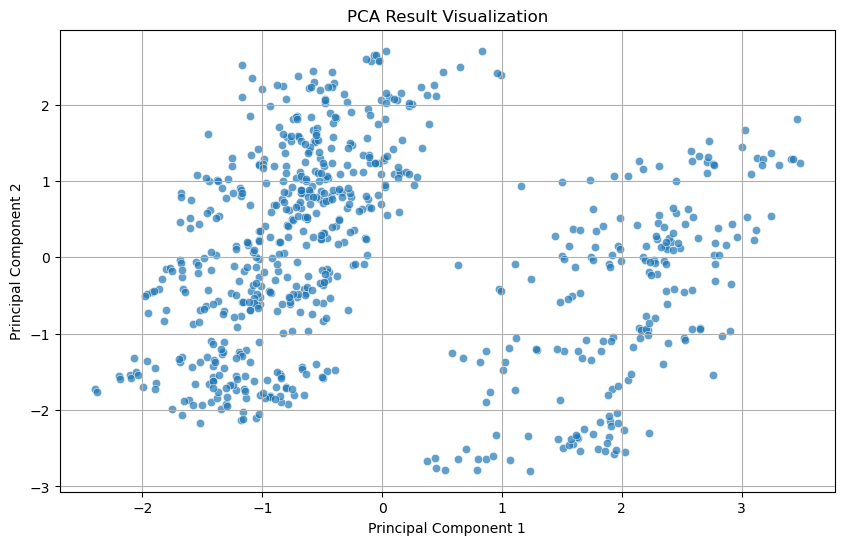

In [27]:
# Visualize the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=principal_df, alpha=0.7)
plt.title('PCA Result Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.savefig(r'C:\Users\HP\Desktop\business-management-project\reports\figures\pca_visualization.png')
plt.show()

In [28]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by component: {explained_variance}')
print(f'Total explained variance: {sum(explained_variance)}')

Explained variance by component: [0.18243081 0.15550356]
Total explained variance: 0.33793437249563596


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [41]:

# Option 1: Parse the date strings to datetime objects
data['Date'] = pd.to_datetime(data['Date'])


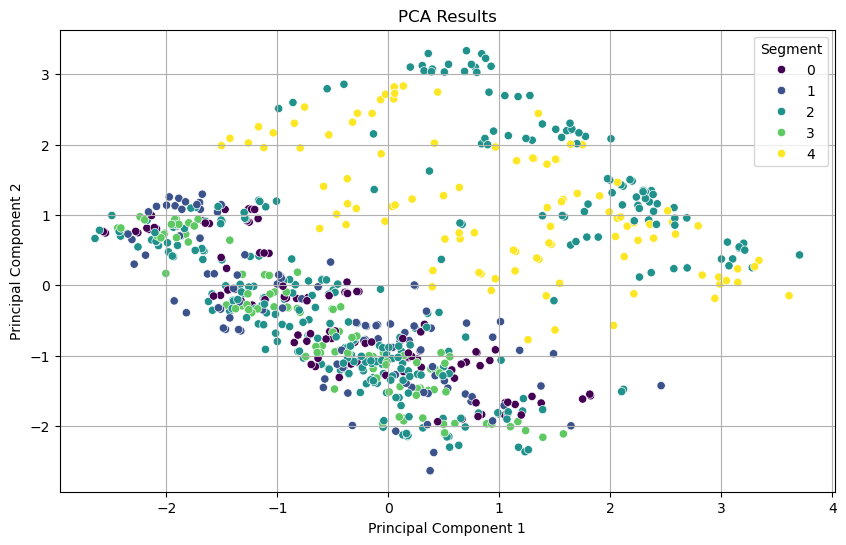

In [45]:
# Sauvegardez la colonne Segment avant la standardisation
segment = data['Segment'].copy()

# Si 'Segment' ne doit pas être inclus dans la standardisation/PCA, retirez-le d'abord
# Exclude 'Date' column as well since it cannot be scaled
data_for_scaling = data.drop(['Segment', 'Date'], axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_scaling)

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Segment'] = segment  # Utilisez la copie sauvegardée

# Visualize PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Segment', data=pca_df, palette='viridis')
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Segment')
plt.grid()
plt.savefig(r'C:\Users\HP\Desktop\business-management-project\reports\figures\kmeans_clusters.png')
plt.show()

### Clustering avec K-Means

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


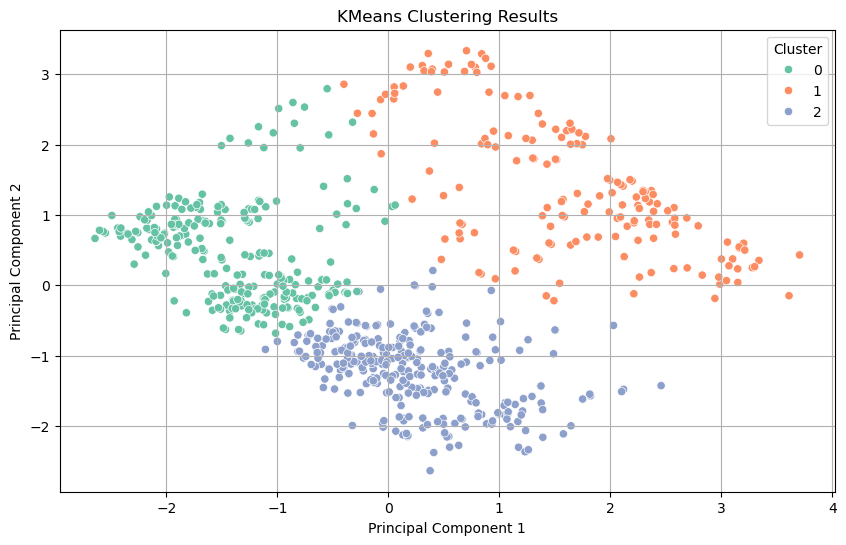

In [47]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
kmeans.fit(pca_data)
pca_df['Cluster'] = kmeans.labels_

# Visualize KMeans Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2')
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.savefig(r'C:\Users\HP\Desktop\business-management-project\reports\figures\kmeans_clusters.png')
plt.show()

In [73]:
# Analyze the clusters
cluster_analysis = pca_df.groupby('Cluster').mean()
print(cluster_analysis)

# Save the cluster analysis results
cluster_analysis.to_csv(r'C:\Users\HP\Desktop\business-management-project\data\processed\cluster_analysis.csv')

              PC1       PC2   Segment
Cluster                              
0       -1.366636  0.458598  1.801619
1        1.639894  1.379189  2.863905
2        0.212736 -1.219565  1.658451


### Entraînement d'un modèle Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split data for training and testing
# Exclude the 'Date' column as it is non-numeric
X = data.drop(['Profit', 'Date'], axis=1)  # All features except Profit and Date
y = data['Profit']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Mean Squared Error: 0.0171
Root Mean Squared Error: 0.1306
R² Score: 0.9280
Mean Absolute Error: 0.0574

Feature Importance:
                Feature  Importance
6            Sale_Price    0.721796
4            Units_Sold    0.160850
3         Discount_Band    0.057914
0               Segment    0.026218
8            Month_Name    0.011152
7          Month_Number    0.008272
1               Country    0.006973
5   Manufacturing_Price    0.002941
2               Product    0.002936
9                  Year    0.000948
10                  Day    0.000000


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [52]:
# Add cluster labels as a feature
X['Cluster'] = kmeans.labels_  # Assuming kmeans is your fitted K-means model

In [53]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Average CV R² score: {cv_scores.mean():.4f}")

Cross-validation R² scores: [0.80720094 0.92145787 0.91234632 0.94762663 0.79519653]
Average CV R² score: 0.8768


### Feature importances

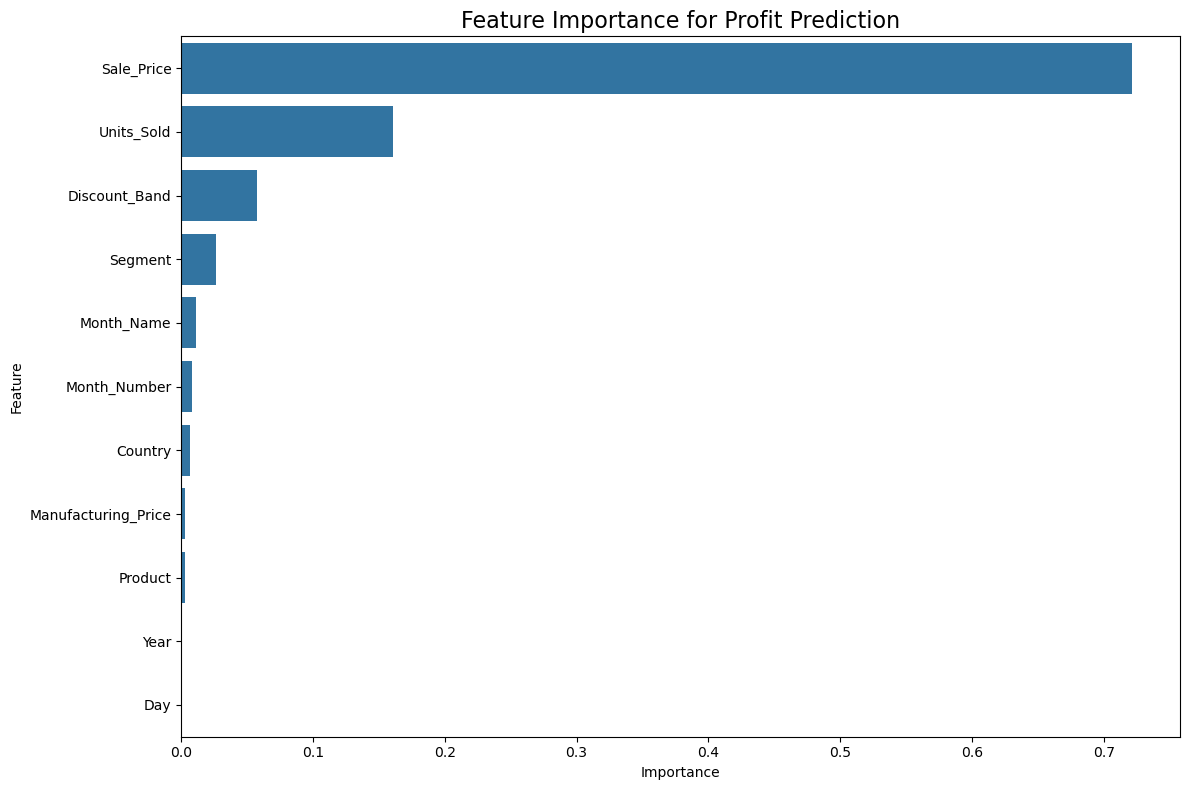

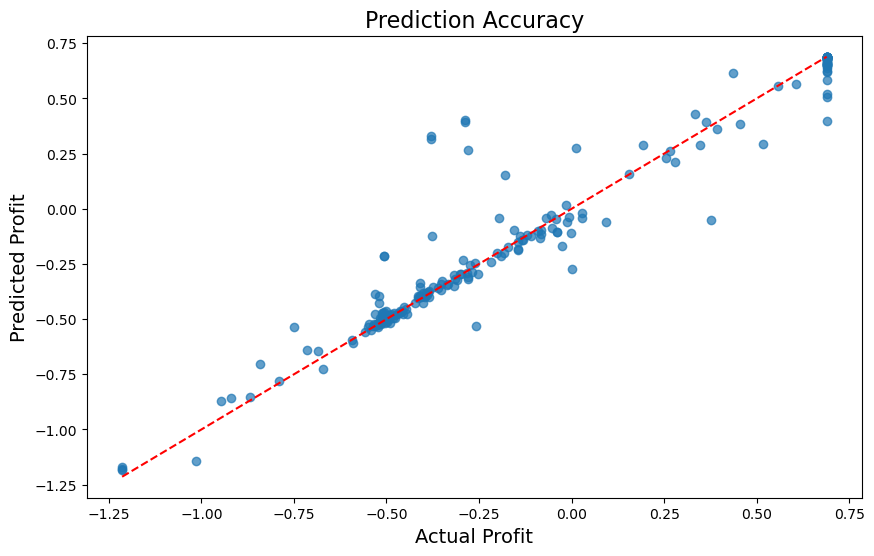

Model training complete. All outputs saved.


In [68]:
# 1. Save the trained model
import joblib
joblib.dump(rf_model, 'profit_prediction_model.pkl')

# 2. Create and save feature importance visualization
plt.figure(figsize=(12, 8))
# Ensure the features match those used during model training
trained_features = X_train.columns  # Use the features from the training set
feature_importance = pd.DataFrame({
    'Feature': trained_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Profit Prediction', fontsize=16)
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# 3. Generate a prediction vs actual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Profit', fontsize=14)
plt.ylabel('Predicted Profit', fontsize=14)
plt.title('Prediction Accuracy', fontsize=16)
plt.savefig('prediction_accuracy.png')
plt.show()

# 4. Create a summary report
with open('model_summary_report.txt', 'w') as f:
    f.write("PROFIT PREDICTION MODEL SUMMARY\n")
    f.write("==============================\n\n")
    f.write(f"Model: Random Forest Regressor\n")
    f.write(f"R² Score: {r2:.4f}\n")
    f.write(f"Root Mean Squared Error: {rmse:.4f}\n")
    f.write(f"Mean Absolute Error: {mae:.4f}\n\n")
    f.write(f"Cross-validation R² scores: {cv_scores}\n")
    f.write(f"Average CV R² score: {cv_scores.mean():.4f}\n\n")
    f.write("Top 5 Important Features:\n")
    for i, row in feature_importance.head(5).iterrows():
        f.write(f"- {row['Feature']}: {row['Importance']:.4f}\n")
    
print("Model training complete. All outputs saved.")

This simulation tool would be particularly valuable for business stakeholders who want to understand how specific changes might affect profits.

In [69]:
def simulate_profit_impact(model, baseline_data, feature_to_change, change_percentage):
    """
    Simulate how changing a feature affects profit predictions.
    
    Parameters:
    model: Trained model
    baseline_data: DataFrame with current feature values
    feature_to_change: String, name of feature to modify
    change_percentage: Float, percentage to increase/decrease the feature
    
    Returns:
    Original profit prediction and new profit prediction
    """
    # Make a copy to avoid modifying the original
    modified_data = baseline_data.copy()
    
    # Calculate new value
    if feature_to_change in modified_data.columns:
        original_value = modified_data[feature_to_change].mean()
        new_value = original_value * (1 + change_percentage/100)
        modified_data[feature_to_change] = modified_data[feature_to_change] * (1 + change_percentage/100)
        
        # Make predictions
        original_prediction = model.predict(baseline_data).mean()
        new_prediction = model.predict(modified_data).mean()
        
        return {
            'feature': feature_to_change,
            'original_value': original_value,
            'new_value': new_value,
            'change_percentage': change_percentage,
            'original_profit_prediction': original_prediction,
            'new_profit_prediction': new_prediction,
            'profit_impact': new_prediction - original_prediction,
            'profit_impact_percentage': ((new_prediction - original_prediction) / original_prediction) * 100
        }
    else:
        return f"Feature '{feature_to_change}' not found in the data."

# Example usage
top_features = feature_importance['Feature'].head(3).tolist()
results = []

for feature in top_features:
    # Simulate 10% increase
    result_increase = simulate_profit_impact(rf_model, X_test, feature, 10)
    results.append(result_increase)
    
    # Simulate 10% decrease
    result_decrease = simulate_profit_impact(rf_model, X_test, feature, -10)
    results.append(result_decrease)

# Create impact report
impact_df = pd.DataFrame(results)
impact_df.to_csv('feature_impact_simulation.csv', index=False)
print(impact_df)

         feature  original_value  new_value  change_percentage  \
0     Sale_Price        0.144727   0.159200                 10   
1     Sale_Price        0.144727   0.130254                -10   
2     Units_Sold        0.031834   0.035017                 10   
3     Units_Sold        0.031834   0.028650                -10   
4  Discount_Band        1.171429   1.288571                 10   
5  Discount_Band        1.171429   1.054286                -10   

   original_profit_prediction  new_profit_prediction  profit_impact  \
0                   -0.126425              -0.173227      -0.046802   
1                   -0.126425              -0.088863       0.037562   
2                   -0.126425              -0.132370      -0.005945   
3                   -0.126425              -0.120609       0.005816   
4                   -0.126425              -0.125615       0.000810   
5                   -0.126425              -0.126425       0.000000   

   profit_impact_percentage  
0        